In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("/Users/atharva/Documents/Coding Practice/Python/dataset/Regression dataset/Housing_Price_Prediction.csv")
df['Index'] = range(0, len(df))
df = df[['Index', 'bedrooms', 'bathrooms', 'sqft_living', 'zipcode','price']]
#df = df[:10000]          # Here we choose first 100 values for our convenience
df.rename(columns = {'bedrooms':'No of Bedrooms', 'bathrooms':'No of Bathrooms', 'sqft_living': 'Area of House', 'zipcode':'Zipcode', 'price':'Price'}, inplace = True) 

In [3]:
df

,Index,No of Bedrooms,No of Bathrooms,Area of House,Zipcode,Price
0,0,3,1.00,1180,98178,221900.0
1,1,3,2.25,2570,98125,538000.0
2,2,2,1.00,770,98028,180000.0
3,3,4,3.00,1960,98136,604000.0
4,4,3,2.00,1680,98074,510000.0
...,...,...,...,...,...,...
21608,21608,3,2.50,1530,98103,360000.0
21609,21609,4,2.50,2310,98146,400000.0
21610,21610,2,0.75,1020,98144,402101.0
21611,21611,3,2.50,1600,98027,400000.0


In [4]:
X = df['Area of House']
Y = df['Price']
n = len(X)

In [5]:
# First we will implement simple linear regression where we will determine relation between the Area of house and the house Price

The mean value for the price of the house is: 540088.1417665294


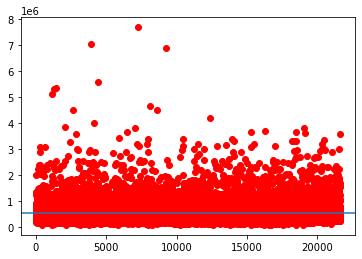

The SSE is:2912.92


In [6]:
# Linear regression is comparison between the SSE where we just have the dependent variable and the situation 
# where we have both independent and dependent variable

# Let us first calculate the SSE where we just consider the dependent variable: Price of the house

# In that case lets plot the scatter plot again with index on X-axis and Price on Y-axis
plt.scatter(df['Index'], df['Price'], color = '#ff0000')

# Now in case we have to predict the next value for the Price of the house, the only way is to determine the mean
price_mean = np.mean(df['Price'])
print('The mean value for the price of the house is:', price_mean)

# Lets plot the mean line on the graph
plt.axhline(y = price_mean)
plt.show()

# Let us determine the SSE for the current line: Mean line

Price = df['Price']
sse = 0 
for i in range(n):
    sse += (Price[i] - price_mean)**2
print('The SSE is:' + '{:.2f}'.format(sse/1000000000000))

In [7]:
# Now we introduce the independent variable with an intension to reduce the SSE

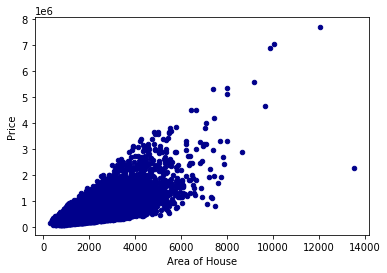

In [8]:
# We will generate the scatter plot of all the data points we have for area of house and its price
ax1 = df.plot.scatter(x = 'Area of House', y = 'Price', c ='DarkBlue')

# Here 1e6 means the value on y-axis * 10^6

In [9]:
# X-axis: Area of house
# Y-axis: Price of the house

# Calculate mean of independent and dependent variable

x_mean = np.mean(X)
print('Mean area of the houses is:',x_mean)

y_mean = np.mean(Y)
print('Mean Price of the houses is:',y_mean)

n = len(X)
print('Number of records:',n)

Mean area of the houses is: 2079.8997362698374
Mean Price of the houses is: 540088.1417665294
Number of records: 21613


In [10]:
# We know that the best fit line can be expressed as: y = b0 + b1x
# b0: bias coefficient
# b1: Scale Factor
# x: Independent Variable(Area of House)
# y: Dependent Variable (Price of the house)

# We need to determine the values for b0 and b1

# b1 = sum[(xi - x_mean)(yi - y_mean)] / sum[(xi - x_mean)**2]

# b0 = y_mean - (b1 * x_mean)

In [11]:
# Determine b1:

num = 0
denom = 0

for i in range(n):
    num += (X[i] - x_mean) * (Y[i] - y_mean)
    denom += (X[i] - x_mean)**2
b1 = num/denom
                 
print('The scaling factor is:', b1)

The scaling factor is: 280.6235678974486


In [12]:
# Determine b0:

b0 = y_mean - (b1 * x_mean)
print('The bias coefficient is:', b0)

The bias coefficient is: -43580.743094474776


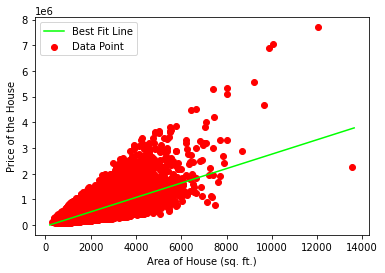

In [13]:
# Plotting the line

x_max = np.max(X) + 100
x_min = np.min(X) - 100

x = np.linspace(x_min, x_max, 1000)

y = b0 + b1 * x

plt.plot(x, y, color='#00ff00', label = 'Best Fit Line')

plt.scatter(X, Y, color='#ff0000', label = 'Data Point')

plt.xlabel('Area of House (sq. ft.)')

plt.ylabel('Price of the House')

plt.legend()

plt.show()

In [14]:
SSE = 0 
for i in range(n):
    y_pred = b0 + (b1 * X[i])
    SSE += (Y[i] - y_pred)**2
print('The SSE is:' + '{:.2f}'.format(SSE/1000000000000))

The SSE is:1477.28


In [15]:
print("Difference between the SSE is:" + "{:.2f}".format((sse - SSE)/1000000000000))

Difference between the SSE is:1435.64


In [16]:
# The equation for the best fit line is:

# y = 269.46205468469446 * x - 32304.6547210266

In [17]:
# Now we can predict the price of the house for a new value of the area of the house considering the similar trend

# For eg: The price for a house with area = 3600 sqft is"

price_house = 269.46205468469446 * 3600 - 32304.6547210266 
print("Price of the house with area 3600 sqft is:" + "{:.2f}".format(price_house))

Price of the house with area 3600 sqft is:937758.74


In [18]:
# We can determine the R2 score (Coefficient of Determination) which can measure the accuracy of the linear model:

# R2 = SSE/SST: Sum of squared errors/ total sum of squares

# R2 = sum(y_pred - y_mean)**2 / sum(yi - y_mean)**2

# The value ranges between 0 and 1

In [19]:
R_SSE = 0
R_SST = 0
R2_score = 0
for i in range(n):
    y_pred = b0 + (b1 * X[i])
    R_SSE += (y_pred - y_mean)**2
    R_SST += (Y[i] - y_mean)**2
R2_score = 1 - (R_SSE / R_SST)
print("The R2 score of the model is: ",format(R2_score))


y_predicted = []
for i in range(n):
    y_pred = b0 + (b1 * X[i])
    y_predicted.append(y_pred)
print("R2 score according Sklearn is: ", r2_score(Y, y_predicted))

The R2 score of the model is:  0.5071467820962087
R2 score according Sklearn is:  0.4928532179037932


In [20]:
# Thus we can say that approx 50% of the variation in the Price of the houses can be explained using the feature: 
# Area of the house

In [21]:
# To further increase the R2 score we need to incorporate all the other features in the dataset

In [22]:
# Now, we include multiple independent features to predict the price of the house